# Лабораторная работа 4

Плотные нейронные сети

Набор базовых данных о биологических сигналах здоровья.
Цель состоит в том, чтобы определить наличие или отсутствие курения с помощью биосигналов.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
dfInit = pd.read_csv('./smoking_5000.csv', delimiter=',', encoding='utf8')
del dfInit["ID"]
df = dfInit.copy(deep=True)
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,F,40,145,50,65.6,1.2,1.2,1.0,1.0,108.0,64.0,91.0,192.0,55.0,88.0,93.0,13.8,1.0,0.9,19.0,11.0,13.0,Y,0,N,0
4996,M,30,175,60,81.0,1.0,1.2,1.0,1.0,119.0,70.0,93.0,145.0,65.0,55.0,77.0,14.9,1.0,1.1,18.0,13.0,27.0,Y,0,Y,0
4997,F,60,145,40,72.0,0.3,0.6,1.0,1.0,136.0,80.0,101.0,211.0,146.0,52.0,130.0,12.5,1.0,0.5,23.0,16.0,12.0,Y,0,Y,0
4998,M,20,175,85,91.0,0.9,1.2,1.0,1.0,135.0,94.0,110.0,209.0,134.0,64.0,117.0,15.8,1.0,1.0,29.0,45.0,146.0,Y,1,N,1


#### Преобразование параметров

In [3]:
def updateData(fieldName):
    dataDf = list(set(df[fieldName].map(lambda elem: elem)))

    cnt = 0
    dataDict = {}
    for shape in dataDf:
        if shape not in dataDict.keys():
            dataDict[shape] = cnt
            cnt += 1
        
    print(f"{fieldName} = {dataDict}\n")

    df[fieldName] = df[fieldName].map(lambda elem: dataDict[elem])

In [4]:
df.dropna(axis=0, inplace=True)

updateData(fieldName="gender")
updateData(fieldName="oral")
updateData(fieldName="tartar")

df

gender = {'F': 0, 'M': 1}

oral = {'Y': 0}

tartar = {'Y': 0, 'N': 1}



,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,0,0,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,0,0,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,0,0,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,40,145,50,65.6,1.2,1.2,1.0,1.0,108.0,64.0,91.0,192.0,55.0,88.0,93.0,13.8,1.0,0.9,19.0,11.0,13.0,0,0,1,0
4996,1,30,175,60,81.0,1.0,1.2,1.0,1.0,119.0,70.0,93.0,145.0,65.0,55.0,77.0,14.9,1.0,1.1,18.0,13.0,27.0,0,0,0,0
4997,0,60,145,40,72.0,0.3,0.6,1.0,1.0,136.0,80.0,101.0,211.0,146.0,52.0,130.0,12.5,1.0,0.5,23.0,16.0,12.0,0,0,0,0
4998,1,20,175,85,91.0,0.9,1.2,1.0,1.0,135.0,94.0,110.0,209.0,134.0,64.0,117.0,15.8,1.0,1.0,29.0,45.0,146.0,0,1,1,1


#### Разделение на обучающие и тестовые данные


In [5]:
x = df.drop(['smoking'], axis=1)
y = df['smoking']

xTraining, xTest, yTraining, yTest = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
scaler = StandardScaler()
scaler.fit(xTraining)
xTrainingTransf = scaler.transform(xTraining)
xTestTransf = scaler.transform(xTest)

#### Многослойный персептронный классификатор

In [7]:
def calculateAccuracy(mlpcClf: MLPClassifier):
    mlpcClf.fit(xTrainingTransf, yTraining)
    return mlpcClf.score(xTestTransf, yTest)

#### Сравнение количества нейронов на 1-ом скрытом слое

In [8]:
hiddenLayerSizeArr = [
    (60,), (100,), (150,), (200,), (250,), (350,), (500,), (750,), (1000,)
]
for layerSize in hiddenLayerSizeArr:
    mlpcClf = MLPClassifier(
        solver='adam',
        hidden_layer_sizes=layerSize, 
        early_stopping=True,
        random_state=42
    )
    
    print('layerSize={0}, accuracy={1}'.format(layerSize, calculateAccuracy(mlpcClf)))

layerSize=(60,), accuracy=0.7426666666666667
layerSize=(100,), accuracy=0.7493333333333333
layerSize=(150,), accuracy=0.7553333333333333
layerSize=(200,), accuracy=0.7233333333333334
layerSize=(250,), accuracy=0.756
layerSize=(350,), accuracy=0.7486666666666667
layerSize=(500,), accuracy=0.7346666666666667
layerSize=(750,), accuracy=0.7466666666666667
layerSize=(1000,), accuracy=0.748


#### Сравнение средств для оптимизации весов

In [9]:
solverArr = [
    'lbfgs', 'sgd', 'adam'
]
for solver in solverArr:
    mlpcClf = MLPClassifier(
        solver=solver,
        hidden_layer_sizes=(150,), 
        early_stopping=True,
        random_state=42
    )
    
    print('solver={0}, accuracy={1}'.format(solver, calculateAccuracy(mlpcClf)))

solver=lbfgs, accuracy=0.6946666666666667
solver=sgd, accuracy=0.6986666666666667
solver=adam, accuracy=0.7553333333333333


#### Сравнение функций активации скрытого слоя

In [10]:
fArr = [
    'identity', 'logistic', 'tanh', 'relu'
]
for f in fArr:
    mlpcClf = MLPClassifier(
        activation=f,
        solver='adam',
        hidden_layer_sizes=(150,), 
        early_stopping=True,
        random_state=42
    )
    
    print('f={0}, accuracy={1}'.format(f, calculateAccuracy(mlpcClf)))

f=identity, accuracy=0.7446666666666667
f=logistic, accuracy=0.7206666666666667
f=tanh, accuracy=0.7473333333333333
f=relu, accuracy=0.7553333333333333


#### Сравнение числа итераций

In [11]:
iterArr = [
    200, 500, 700, 1000
]
for iter in iterArr:
    mlpcClf = MLPClassifier(
        activation='relu',
        solver='adam',
        hidden_layer_sizes=(150,), 
        early_stopping=True,
        random_state=42,
        max_iter=iter
    )
    
    print('max_iter={0}, accuracy={1}'.format(iter, calculateAccuracy(mlpcClf)))

max_iter=200, accuracy=0.7553333333333333
max_iter=500, accuracy=0.7553333333333333
max_iter=700, accuracy=0.7553333333333333
max_iter=1000, accuracy=0.7553333333333333


#### Итоговый результат

In [12]:
mlpcClf = MLPClassifier(
    activation='relu',
    solver='adam',
    hidden_layer_sizes=(150,), 
    early_stopping=True,
    random_state=42,
    max_iter=200
)

print('accuracy={0}'.format(calculateAccuracy(mlpcClf)))

accuracy=0.7553333333333333


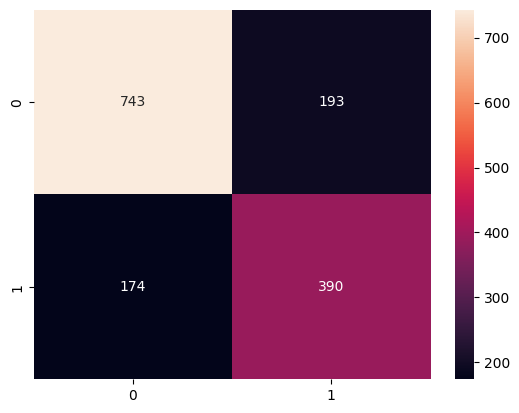

In [13]:
classes_names = ['0','1']
cm = pd.DataFrame(
    confusion_matrix(yTest, mlpcClf.predict(xTestTransf)), 
    columns=classes_names, 
    index=classes_names
)
                  
sns.heatmap(cm, annot=True, fmt='d')
plt.show()